<a href="https://colab.research.google.com/github/larcherg/-/blob/main/PF_EDA_%D0%B4%D0%BB%D1%8F_%D1%83%D0%BB%D1%83%D1%87%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения

**Цель:**
Улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными. 

В качестве датасета загрузим данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR)

### 1. Получим данные и загрузим их в рабочую среду.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
data['MedHouseVal'] = housing['target']

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 2. Проверим данные на наличие пропусков.

In [ ]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Пропусков нет.

### 3. Разделим выборку на обучающее и тестовое подмножества. 

80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Построим модель линейной регрессии. Вычислим метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
rmse_train = (np.mean((y_train - y_pred_train) ** 2)) ** 0.5
rmse_train

0.7196757085831575

In [ ]:
rmse_test = (np.mean((y_test - y_pred_test) ** 2)) ** 0.5
rmse_test

0.7455813830127763

In [ ]:
r2_train = model.score(X_train, y_train)
r2_train

0.6125511913966952

In [ ]:
r2_test= model.score(X_test, y_test)
r2_test

0.575787706032451

Запишем метрики в таблицу для дальнейшего сравнения:

In [ ]:
results = pd.DataFrame(columns=['Модель','RMSE train', 'RMSE test', 'R2 train', 'R2 test'])

In [ ]:
results.loc[len(results)] = ['Базовая Линейная регрессия', rmse_train, rmse_test, r2_train, r2_test]

In [ ]:
results

,Модель,RMSE train,RMSE test,R2 train,R2 test
0,Базовая Линейная регрессия,0.719676,0.745581,0.612551,0.575788


### 5. Построим и проанализируем график распределения целевой переменной.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


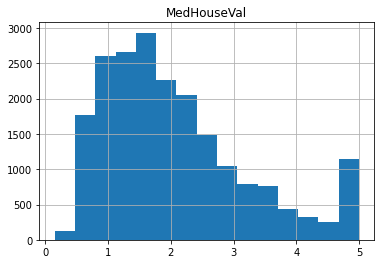

In [ ]:
y.hist(bins=15)
plt.title('MedHouseVal')
plt.show()

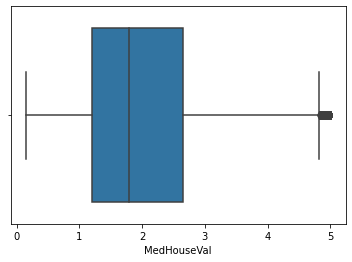

In [ ]:
sns.boxplot(x=y)
plt.show()

In [ ]:
y[y > 4.95].value_counts()

5.00001    965
5.00000     27
4.95500      3
4.95600      2
4.96400      2
4.95800      1
4.96000      1
4.95900      1
4.99100      1
4.95400      1
4.97400      1
4.98600      1
4.99000      1
4.98400      1
4.98700      1
4.97600      1
4.98800      1
Name: MedHouseVal, dtype: int64

Видны выбросы в районе 5, при этом 965 обектов с одинаковым значением 5.00001, Это либо ошибка, либо так обозначается любая цена > 5. Пробовала удалить эти выбросы, но метрика R2 модели стала хуже, поэтому оставила.

### 6. Удалим признаки с сильной корреляцией и обучим модель заново.

In [ ]:
corr_matrix = data.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


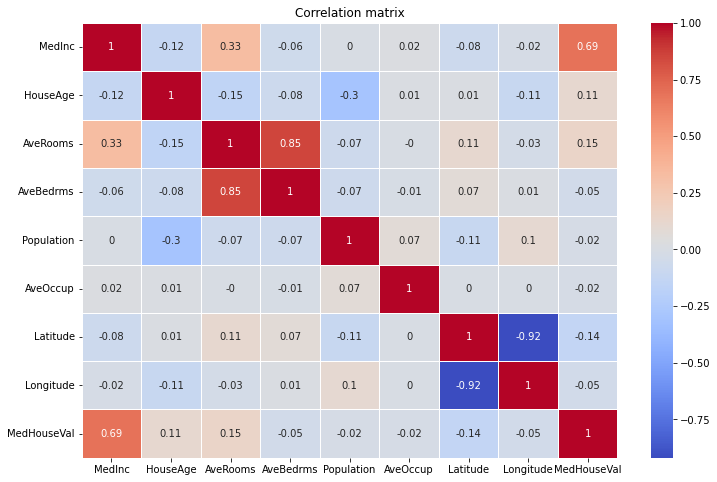

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = np.round(corr_matrix, 2)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

Наблюдается сильная корреляция между признаками AveRooms и AveBedrms, а это плохо для обучения модели линейной регрессии. Удалим первый из этих признаков, так как у него еще небольшая корреляция с признаком MedInc

In [ ]:
data.drop('AveRooms', axis=1, inplace=True)

Обучим модель заново (оформим обучение и расчет метрик как функцию):

In [ ]:
def train_model():
    X = data.drop('MedHouseVal', axis=1)
    y = data['MedHouseVal']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
 
    model = LinearRegression()
    model.fit(X_train, y_train)

    # рассчет метрик
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse_train = (np.mean((y_train - y_pred_train) ** 2)) ** 0.5
    rmse_test = (np.mean((y_test - y_pred_test) ** 2)) ** 0.5

    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    return (rmse_train, rmse_test, r2_train, r2_test)

Посмотрим как изменились метрики:

In [ ]:
res = train_model()
results.loc[len(results)] = ['После удаления корр столбца', res[0], res[1], res[2], res[3]]
results

,Модель,RMSE train,RMSE test,R2 train,R2 test
0,Базовая Линейная регрессия,0.719676,0.745581,0.612551,0.575788
1,После удаления корр столбца,0.727242,0.741927,0.604361,0.579936


Вывод: Метрики существенно не поменялись. Часть стала чуть лучшее, часть чуть хуже.

### Исследуем признаки на выбросы. Удалим выбросы и обучим модель заново.

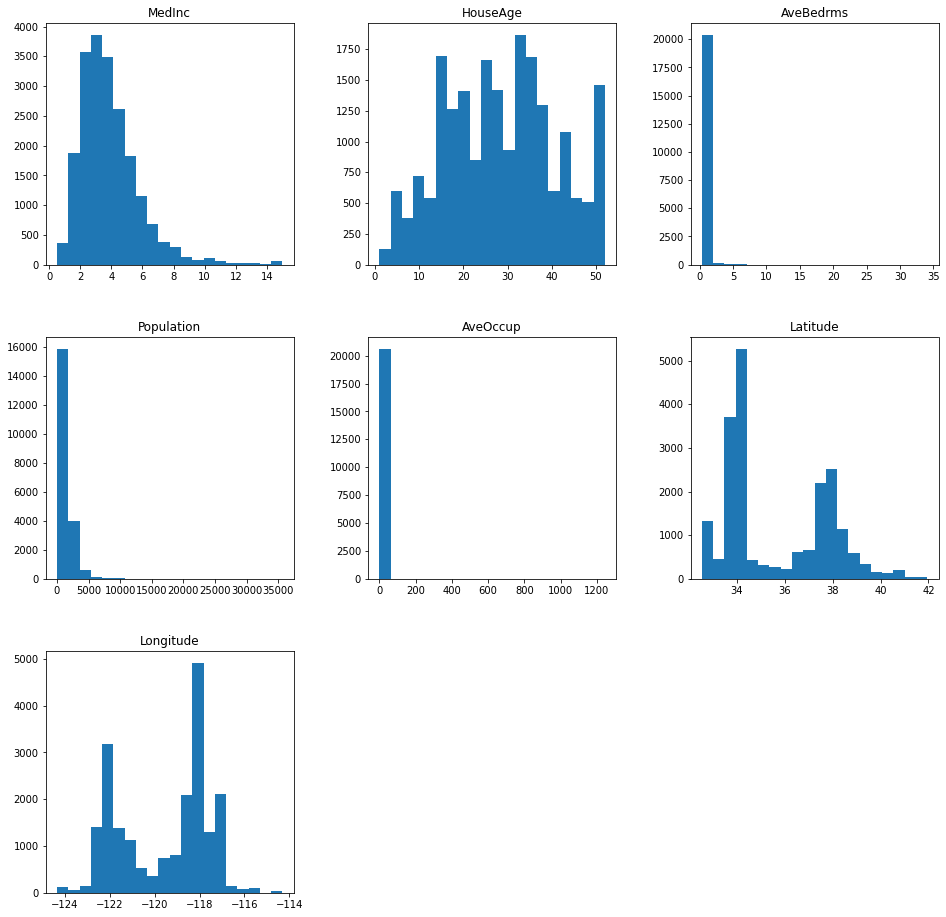

In [ ]:
X = data.drop('MedHouseVal', axis=1)
X.hist(figsize=(16, 16), bins=20, grid=False);



---



Удалим строки с выбросами в признаке AveBedrms:

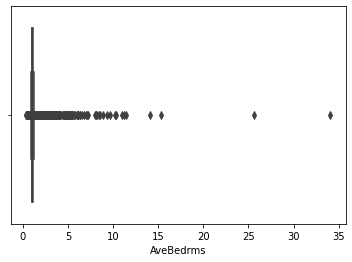

In [ ]:
c = data['AveBedrms']
sns.boxplot(x=c);

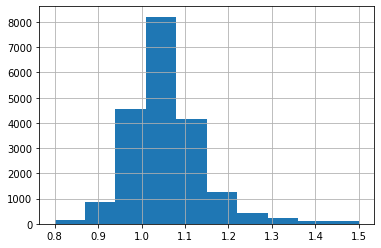

In [ ]:
cn =c[(c <= 1.5) & (c >= 0.8)]
cn.hist();

In [ ]:
len(c[~((c <= 1.5) & (c >= 0.8))])   # удалим 565 строк, не критично?

565

In [ ]:
data = data[(data['AveBedrms'] <= 1.5) & (data['AveBedrms'] >= 0.8)]

In [ ]:
# как вариант можно не удалять, а заменить медианой - проверила, получилось хуже, чем если удалять
# data.loc[(data['AveBedrms'] > 1.6) | (data['AveBedrms'] < 0.8)  , 'AveBedrms'] = data['AveBedrms'].median() 

Удалим строки с выбросами в признаке AveOccup:


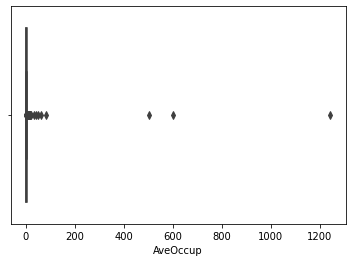

In [ ]:
c = data['AveOccup']
sns.boxplot(x=c);

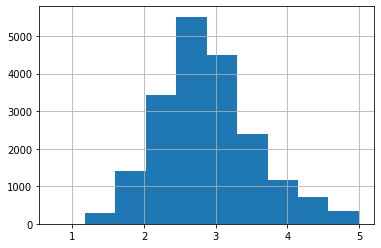

In [ ]:
cn =c[c <= 5]
cn.hist();

In [ ]:
len (c[c > 5])

328

In [ ]:
data = data[data['AveOccup'] <= 5]

Обучим модель заново и посчитаем метрики:

In [ ]:
res = train_model()
results.loc[len(results)] = ['После удаления выбросов', res[0], res[1], res[2], res[3]]
results

,Модель,RMSE train,RMSE test,R2 train,R2 test
0,Базовая Линейная регрессия,0.719676,0.745581,0.612551,0.575788
1,После удаления корр столбца,0.727242,0.741927,0.604361,0.579936
2,После удаления выбросов,0.659591,0.658874,0.674705,0.674244


Все метрики улучшились.

### 8. Изменим несколько признаков математически и снова обучим модель. 

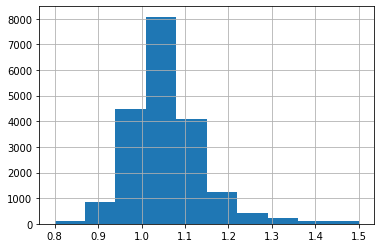

In [ ]:
data['AveBedrms'].hist();

In [ ]:
data['AveBedrms'] = np.log(data['AveBedrms'])

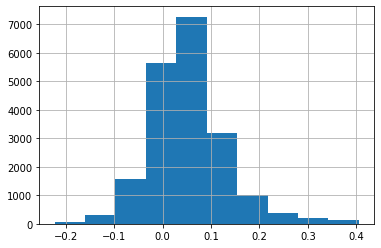

In [ ]:
data['AveBedrms'].hist();

In [ ]:
#data['HouseAge'] = data['HouseAge'] ** 2

In [ ]:
data['Latitude'] = data['Latitude'] ** 0.5

Обучим модель заново и посчитаем метрики:

In [ ]:
res = train_model()
results.loc[len(results)] = ['После преобразованяи признаков', res[0], res[1], res[2], res[3]]
results

,Модель,RMSE train,RMSE test,R2 train,R2 test
0,Базовая Линейная регрессия,0.719676,0.745581,0.612551,0.575788
1,После удаления корр столбца,0.727242,0.741927,0.604361,0.579936
2,После удаления выбросов,0.659591,0.658874,0.674705,0.674244
3,После преобразованяи признаков,0.659393,0.658573,0.674900,0.674542


Перебрала несколько вариантов Математических преобразований признаков, но существенно улучшить метрики не получилось.

### 9. Выводы по проделанной работе.

Была проведена следующая работа с данными: 

Данные проверенны на наличие пропусков, пропусков не обнаружено

Изучена целевая переменная, решено не удалять выбросы, так как это приводило к ухудщению метрики R2.

Изучена корреляция между признаками и удален один из столбцов с сильной корреляцией.

Исследованы и удалены выбросы в нескольких признаках.

Применены математические преобразования нескольких признаков.

В результате удалось улучшить метрики модели - уменьшить RMSE и увеличить R2, в основном за счет удаления выбросов в признаках.